In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [ ]:
df_churn = pd.read_csv('gomart_churn.csv')

In [ ]:
df_churn.head(10)

,customer_id,gender,age,income_level,state,city,platform,order_frequency,avg_order_value,preferred_payment,loyalty_program,days_since_last_purchase,churn
0,CUST00001,Female,51,High,Lagos,Yaba,iOS,4,10000,Paystack,No,20,0
1,CUST00002,Male,36,High,Abuja,Utako,Web,6,50000,Paystack,Yes,65,0
2,CUST00003,Male,58,Middle,Abuja,Garki,Android,10,10000,Bank Transfer,No,113,0
3,CUST00004,Female,28,Low,Lagos,Surulere,iOS,4,20000,COD,No,192,0
4,CUST00005,Female,41,High,Abuja,Maitama,Android,10,10000,Mobile Money,No,101,0
5,CUST00006,Female,31,Middle,Abuja,Asokoro,Web,10,2000,Paystack,No,111,0
6,CUST00007,Male,28,Middle,Abuja,Garki,Web,7,30000,COD,Yes,177,1
7,CUST00008,Male,31,High,Abuja,Maitama,Android,3,2000,COD,No,102,0
8,CUST00009,Male,38,High,Lagos,Surulere,iOS,3,30000,Flutterwave,Yes,8,0
9,CUST00010,Male,54,High,Rivers,Mile 1,Web,1,30000,COD,No,192,1


In [ ]:
df_churn.isna().sum()

,0
customer_id,0
gender,0
age,0
income_level,0
state,0
city,0
platform,0
order_frequency,0
avg_order_value,0
preferred_payment,0


In [ ]:
# Calculate RFM-style features

# Recency: days_since_last_purchase (lower is better)
df_churn['Recency'] = df_churn['days_since_last_purchase']

# Frequency: order_frequency (higher is better)
df_churn['Frequency'] = df_churn['order_frequency']

# Monetary: avg_order_value (higher is better)
df_churn['Monetary'] = df_churn['avg_order_value']

print("RFM features added:")
display(df_churn[['Recency', 'Frequency', 'Monetary']].head(10))

RFM features added:


,Recency,Frequency,Monetary
0,20,4,10000
1,65,6,50000
2,113,10,10000
3,192,4,20000
4,101,10,10000
5,111,10,2000
6,177,7,30000
7,102,3,2000
8,8,3,30000
9,192,1,30000


In [ ]:
for col in df_churn.columns:
    print(f"\nValue Counts for column: {col}")
    display(df_churn[col].value_counts())


Value Counts for column: customer_id


,count
customer_id,
CUST05000,1
CUST00001,1
CUST00002,1
CUST00003,1
CUST00004,1
...,...
CUST00013,1
CUST00012,1
CUST00011,1



Value Counts for column: gender


,count
gender,
Male,2520
Female,2480



Value Counts for column: age


,count
age,
37,123
33,120
48,117
38,117
31,116
40,116
24,115
62,115
60,115



Value Counts for column: income_level


,count
income_level,
Low,1702
High,1688
Middle,1610



Value Counts for column: state


,count
state,
Rivers,1697
Abuja,1679
Lagos,1624



Value Counts for column: city


,count
city,
Asokoro,363
Port Harcourt GRA,358
Yaba,348
Mile 1,347
D-line,341
Maitama,337
Trans-Amadi,337
Utako,335
Lekki,330



Value Counts for column: platform


,count
platform,
Android,1709
iOS,1655
Web,1636



Value Counts for column: order_frequency


,count
order_frequency,
1,548
9,542
8,523
3,507
5,499
7,499
10,481
2,473
4,467



Value Counts for column: avg_order_value


,count
avg_order_value,
10000,873
5000,860
50000,848
2000,815
20000,809
30000,795



Value Counts for column: preferred_payment


,count
preferred_payment,
Bank Transfer,1067
Paystack,1011
COD,1005
Mobile Money,987
Flutterwave,930



Value Counts for column: loyalty_program


,count
loyalty_program,
No,2543
Yes,2457



Value Counts for column: days_since_last_purchase


,count
days_since_last_purchase,
20,38
145,38
165,36
130,36
137,35
...,...
48,14
193,14
182,13



Value Counts for column: churn


,count
churn,
0,3385
1,1615



Value Counts for column: Recency


,count
Recency,
20,38
145,38
165,36
130,36
137,35
...,...
48,14
193,14
182,13



Value Counts for column: Frequency


,count
Frequency,
1,548
9,542
8,523
3,507
5,499
7,499
10,481
2,473
4,467



Value Counts for column: Monetary


,count
Monetary,
10000,873
5000,860
50000,848
2000,815
20000,809
30000,795


In [ ]:
# Create a Churn Risk Index

# This is a simplified index combining recency, frequency, and loyalty
# We need to decide on how to combine them.
# A simple approach: higher recency (more days since last purchase) increases risk
# higher frequency decreases risk, loyalty program membership decreases risk.

# Assume higher Recency = higher risk (direct relationship)
# Assume higher Frequency = lower risk (inverse relationship)
# Assume Loyalty Program = lower risk (binary relationship: Yes/No)

# We might need to normalize or scale features before combining them
# For a simple index, let's consider inverse of frequency and map loyalty

# Map Loyalty Program to a numerical value (e.g., Yes = 0, No = 1 for risk)
df_churn['Loyalty_Risk_Factor'] = df_churn['loyalty_program'].apply(lambda x: 0 if x == 'Yes' else 1)

# Create a simple index (example: Recency + (1/Frequency) + Loyalty_Risk_Factor)
# Need to handle Frequency = 0 if it exists to avoid division by zero.
# Let's check frequency distribution first.
print("\nFrequency distribution:")
display(df_churn['order_frequency'].value_counts())

# If Frequency can be 0, we might need to handle it, e.g., treat 0 frequency as high risk.
# Assuming Frequency > 0 for now, or handling 0 separately.
# Let's use a simple additive model after potentially scaling.
# For a basic index without scaling:
# Higher Recency adds to risk.
# Lower Frequency adds to risk (inverse relationship).
# Loyalty_Risk_Factor adds to risk if not in program.

# Let's create a base risk from Recency
df_churn['Churn_Risk_Index'] = df_churn['Recency']

# Add risk from Frequency (inverse) - handle potential 0 Frequency
# Replace 0 frequency with a value representing high risk, e.g., max frequency + 1 or a large number
max_frequency = df_churn['Frequency'].max()
df_churn['Frequency_Risk'] = df_churn['Frequency'].apply(lambda x: max_frequency + 1 if x == 0 else 1/x)
# Or a simpler inverse based on ranking/quantiles might be better

# Let's use ranking for a more robust approach for Frequency and Recency for the index
df_churn['Recency_Rank'] = df_churn['Recency'].rank(method='first', ascending=False) # Higher rank = higher risk
df_churn['Frequency_Rank'] = df_churn['Frequency'].rank(method='first', ascending=True) # Higher rank = lower risk

# Combine ranks and loyalty factor for a simple index
# Lower Churn_Risk_Index indicates lower risk
df_churn['Churn_Risk_Index'] = df_churn['Recency_Rank'] + df_churn['Frequency_Rank'] + df_churn['Loyalty_Risk_Factor'] * (df_churn['Recency_Rank'].max() + df_churn['Frequency_Rank'].max()) # Scale loyalty factor

print("\nChurn Risk Index added:")
display(df_churn[['Recency', 'Frequency', 'Loyalty_Risk_Factor', 'Recency_Rank', 'Frequency_Rank', 'Churn_Risk_Index']].head())

# Note: Creating RFM scores and segments typically involves quantiles and assigning scores (1-5).
# We can implement that separately if needed.


Frequency distribution:


,count
order_frequency,
1,548
9,542
8,523
3,507
5,499
7,499
10,481
2,473
4,467



Churn Risk Index added:


,Recency,Frequency,Loyalty_Risk_Factor,Recency_Rank,Frequency_Rank,Churn_Risk_Index
0,20,4,1,4521.0,1529.0,16050.0
1,65,6,0,3397.0,2495.0,5892.0
2,113,10,1,2164.0,4520.0,16684.0
3,192,4,1,198.0,1530.0,11728.0
4,101,10,1,2478.0,4521.0,16999.0


In [ ]:
# Create a Churn Risk Index

# This is a simplified index combining recency, frequency, and loyalty
# We need to decide on how to combine them.
# A simple approach: higher recency (more days since last purchase) increases risk
# higher frequency decreases risk, loyalty program membership decreases risk.

# Assume higher Recency = higher risk (direct relationship)
# Assume higher Frequency = lower risk (inverse relationship)
# Assume Loyalty Program = lower risk (binary relationship: Yes/No)

# We might need to normalize or scale features before combining them
# For a simple index, let's consider inverse of frequency and map loyalty

# Map Loyalty Program to a numerical value (e.g., Yes = 0, No = 1 for risk)
df_churn['Loyalty_Risk_Factor'] = df_churn['loyalty_program'].apply(lambda x: 0 if x == 'Yes' else 1)

# Create a simple index (example: Recency + (1/Frequency) + Loyalty_Risk_Factor)
# Need to handle Frequency = 0 if it exists to avoid division by zero.
# Let's check frequency distribution first.
print("\nFrequency distribution:")
display(df_churn['order_frequency'].value_counts())

# If Frequency can be 0, we might need to handle it, e.g., treat 0 frequency as high risk.
# Assuming Frequency > 0 for now, or handling 0 separately.
# Let's use a simple additive model after potentially scaling.
# For a basic index without scaling:
# Higher Recency adds to risk.
# Lower Frequency adds to risk (inverse relationship).
# Loyalty_Risk_Factor adds to risk if not in program.

# Let's create a base risk from Recency
df_churn['Churn_Risk_Index'] = df_churn['Recency']

# Add risk from Frequency (inverse) - handle potential 0 Frequency
# Replace 0 frequency with a value representing high risk, e.g., max frequency + 1 or a large number
max_frequency = df_churn['Frequency'].max()
df_churn['Frequency_Risk'] = df_churn['Frequency'].apply(lambda x: max_frequency + 1 if x == 0 else 1/x)
# Or a simpler inverse based on ranking/quantiles might be better

# Let's use ranking for a more robust approach for Frequency and Recency for the index
df_churn['Recency_Rank'] = df_churn['Recency'].rank(method='first', ascending=False) # Higher rank = higher risk
df_churn['Frequency_Rank'] = df_churn['Frequency'].rank(method='first', ascending=True) # Higher rank = lower risk

# Combine ranks and loyalty factor for a simple index
# Lower Churn_Risk_Index indicates lower risk
df_churn['Churn_Risk_Index'] = df_churn['Recency_Rank'] + df_churn['Frequency_Rank'] + df_churn['Loyalty_Risk_Factor'] * (df_churn['Recency_Rank'].max() + df_churn['Frequency_Rank'].max()) # Scale loyalty factor

print("\nChurn Risk Index added:")
display(df_churn[['Recency', 'Frequency', 'Loyalty_Risk_Factor', 'Recency_Rank', 'Frequency_Rank', 'Churn_Risk_Index']].head())

# Note: Creating RFM scores and segments typically involves quantiles and assigning scores (1-5).
# We can implement that separately if needed.


Frequency distribution:


,count
order_frequency,
1,548
9,542
8,523
3,507
5,499
7,499
10,481
2,473
4,467



Churn Risk Index added:


,Recency,Frequency,Loyalty_Risk_Factor,Recency_Rank,Frequency_Rank,Churn_Risk_Index
0,20,4,1,4521.0,1529.0,16050.0
1,65,6,0,3397.0,2495.0,5892.0
2,113,10,1,2164.0,4520.0,16684.0
3,192,4,1,198.0,1530.0,11728.0
4,101,10,1,2478.0,4521.0,16999.0


Churn Rate by City:


churn,0,1,ChurnRate
city,,,
Surulere,0.591331,0.408669,0.408669
Victoria Island,0.607383,0.392617,0.392617
Lekki,0.636364,0.363636,0.363636
Ikeja,0.636923,0.363077,0.363077
Wuse,0.662614,0.337386,0.337386
Yaba,0.675287,0.324713,0.324713
Trans-Amadi,0.685460,0.314540,0.314540
Maitama,0.688427,0.311573,0.311573
Asokoro,0.691460,0.308540,0.308540


/tmp/ipython-input-3279235839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_city.index, y=churn_by_city['ChurnRate'], palette='viridis')


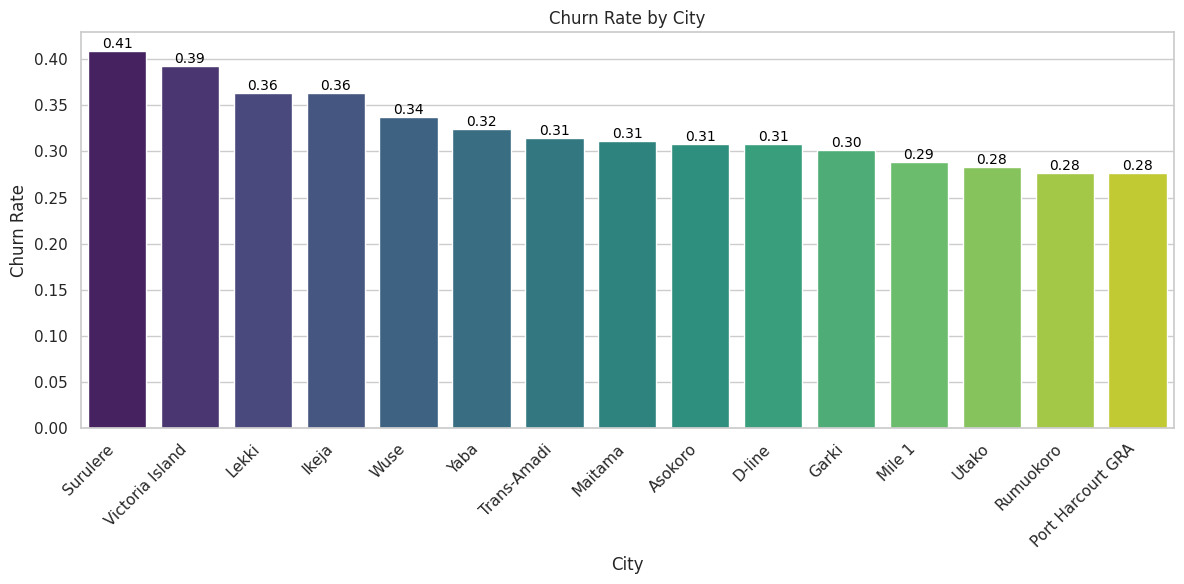

In [ ]:
# Calculate churn rate by city
churn_by_city = df_churn.groupby('city')['churn'].value_counts(normalize=True).unstack().fillna(0)

# The churn rate is the proportion of churned customers (churn=1)
churn_by_city['ChurnRate'] = churn_by_city[1]

# Sort by churn rate for better visualization
churn_by_city = churn_by_city.sort_values('ChurnRate', ascending=False)

print("Churn Rate by City:")
display(churn_by_city)

# Visualize churn rate by city
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=churn_by_city.index, y=churn_by_city['ChurnRate'], palette='viridis')
plt.title('Churn Rate by City')
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

# Add churn rate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Churn Rate by State:


churn,0,1,ChurnRate
state,,,
Lagos,0.630542,0.369458,0.369458
Abuja,0.691483,0.308517,0.308517
Rivers,0.707130,0.292870,0.292870


/tmp/ipython-input-853767037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_state.index, y=churn_by_state['ChurnRate'], palette='viridis')


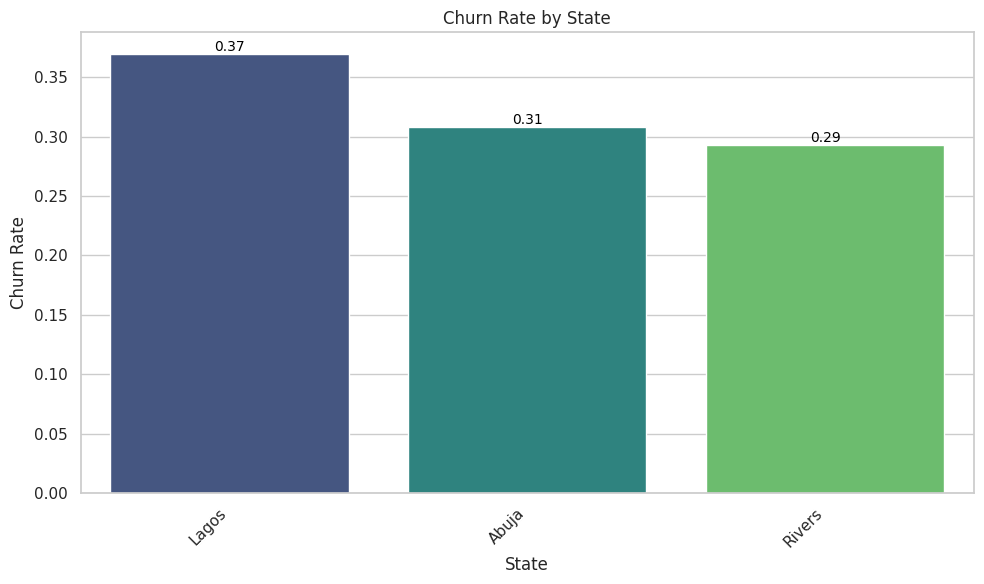

In [ ]:
# Calculate churn rate by state
churn_by_state = df_churn.groupby('state')['churn'].value_counts(normalize=True).unstack().fillna(0)

# The churn rate is the proportion of churned customers (churn=1)
churn_by_state['ChurnRate'] = churn_by_state[1]

# Sort by churn rate for better visualization
churn_by_state = churn_by_state.sort_values('ChurnRate', ascending=False)

print("Churn Rate by State:")
display(churn_by_state)

# Visualize churn rate by state
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=churn_by_state.index, y=churn_by_state['ChurnRate'], palette='viridis')
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

# Add churn rate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

City Tier distribution:


,count
City_Tier,
Urban,2605
Suburban,2395



Churn Rate by City Tier:


churn,0,1,ChurnRate
City_Tier,,,
Urban,0.650288,0.349712,0.349712
Suburban,0.706054,0.293946,0.293946


/tmp/ipython-input-1193397873.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_city_tier.index, y=churn_by_city_tier['ChurnRate'], palette='viridis')


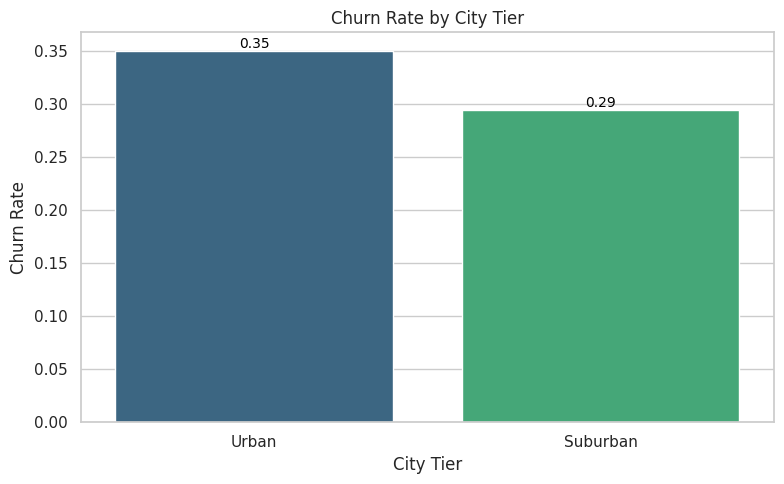

In [ ]:
# Classify cities into urban and suburban tiers
# Define a mapping based on the user's examples and potentially general knowledge or assumptions
# You might need to adjust this mapping based on domain expertise

urban_cities = ['Ikeja', 'Lekki', 'Victoria Island', 'Yaba', 'Surulere', 'Maitama', 'Garki', 'Wuse'] # Examples provided + others often considered urban
suburban_cities = ['Rumuokoro', 'Mile 1', 'Trans-Amadi', 'D-line', 'Port Harcourt GRA', 'Utako', 'Asokoro'] # Examples provided + others in Rivers/Abuja

def classify_city_tier(city):
    if city in urban_cities:
        return 'Urban'
    elif city in suburban_cities:
        return 'Suburban'
    else:
        return 'Other' # Handle cities not in the defined lists

# Apply the classification function to create the new 'City_Tier' column
df_churn['City_Tier'] = df_churn['city'].apply(classify_city_tier)

print("City Tier distribution:")
display(df_churn['City_Tier'].value_counts())

# Calculate churn rate by City Tier
churn_by_city_tier = df_churn.groupby('City_Tier')['churn'].value_counts(normalize=True).unstack().fillna(0)

# The churn rate is the proportion of churned customers (churn=1)
churn_by_city_tier['ChurnRate'] = churn_by_city_tier[1]

# Sort by churn rate for better visualization
churn_by_city_tier = churn_by_city_tier.sort_values('ChurnRate', ascending=False)

print("\nChurn Rate by City Tier:")
display(churn_by_city_tier)

# Visualize churn rate by City Tier
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=churn_by_city_tier.index, y=churn_by_city_tier['ChurnRate'], palette='viridis')
plt.title('Churn Rate by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0, ha='center') # Keep labels horizontal
plt.tight_layout()

# Add churn rate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
# Create Spend-to-Income Ratio feature

# Map income levels to numerical proxies (based on common assumptions, adjust if needed)
# Assuming Low < Middle < High income
income_mapping = {
    'Low': 1,      # Example numerical value for Low income
    'Middle': 2,   # Example numerical value for Middle income
    'High': 3      # Example numerical value for High income
}

# Apply the mapping to create a numerical income proxy
df_churn['Income_Proxy'] = df_churn['income_level'].map(income_mapping)

# Calculate Spend-to-Income Ratio
# Add a small constant to Income_Proxy to avoid division by zero if any income level maps to 0
df_churn['Spend_to_Income_Ratio'] = df_churn['avg_order_value'] / (df_churn['Income_Proxy'] + 1e-6) # Add epsilon to avoid division by zero


print("Spend-to-Income Ratio feature added:")
display(df_churn[['income_level', 'Income_Proxy', 'avg_order_value', 'Spend_to_Income_Ratio']].head())

# You can also categorize this ratio if needed for further analysis
# For example, identify customers with very high spend relative to their income level

Spend-to-Income Ratio feature added:


,income_level,Income_Proxy,avg_order_value,Spend_to_Income_Ratio
0,High,3,10000,3333.332222
1,High,3,50000,16666.661111
2,Middle,2,10000,4999.997500
3,Low,1,20000,19999.980000
4,High,3,10000,3333.332222


In [ ]:
# Categorize Spend-to-Income Ratio into quartiles

# Calculate the quartiles of the Spend_to_Income_Ratio
df_churn['Spend_to_Income_Ratio_Quartile'] = pd.qcut(
    df_churn['Spend_to_Income_Ratio'],
    q=4, # Number of quartiles
    labels=['Low_Ratio', 'Medium_Low_Ratio', 'Medium_High_Ratio', 'High_Ratio'] # Labels for the categories
)

print("Spend-to-Income Ratio categorized into quartiles:")
display(df_churn[['income_level', 'avg_order_value', 'Spend_to_Income_Ratio', 'Spend_to_Income_Ratio_Quartile']].head())

print("\nDistribution of Spend-to-Income Ratio Quartiles:")
display(df_churn['Spend_to_Income_Ratio_Quartile'].value_counts())

# You can also analyze churn rate by these categories if interested

Spend-to-Income Ratio categorized into quartiles:


,income_level,avg_order_value,Spend_to_Income_Ratio,Spend_to_Income_Ratio_Quartile
0,High,10000,3333.332222,Medium_Low_Ratio
1,High,50000,16666.661111,Medium_High_Ratio
2,Middle,10000,4999.997500,Medium_Low_Ratio
3,Low,20000,19999.980000,High_Ratio
4,High,10000,3333.332222,Medium_Low_Ratio



Distribution of Spend-to-Income Ratio Quartiles:


,count
Spend_to_Income_Ratio_Quartile,
Medium_High_Ratio,1405
Low_Ratio,1391
Medium_Low_Ratio,1111
High_Ratio,1093


Churn Rate by Platform:


churn,0,1,ChurnRate
platform,,,
Web,0.600244,0.399756,0.399756
iOS,0.708761,0.291239,0.291239
Android,0.719719,0.280281,0.280281


/tmp/ipython-input-1279719911.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_platform.index, y=churn_by_platform['ChurnRate'], palette='viridis')


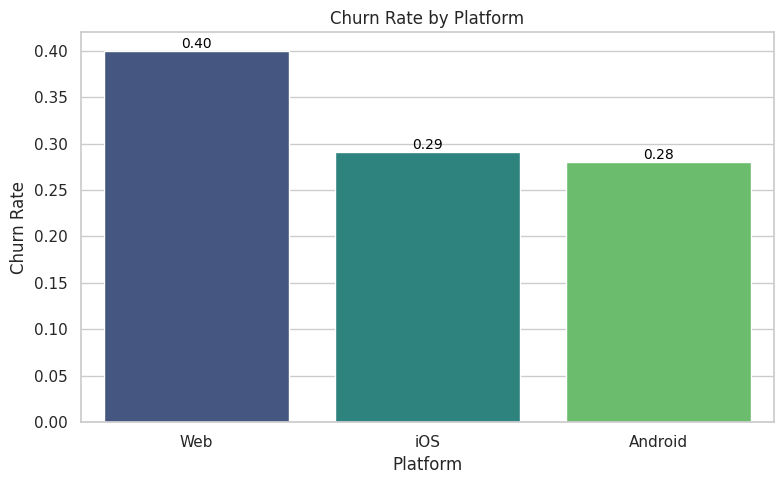

In [ ]:
# Calculate churn rate by platform
churn_by_platform = df_churn.groupby('platform')['churn'].value_counts(normalize=True).unstack().fillna(0)

# The churn rate is the proportion of churned customers (churn=1)
churn_by_platform['ChurnRate'] = churn_by_platform[1]

# Sort by churn rate for better visualization
churn_by_platform = churn_by_platform.sort_values('ChurnRate', ascending=False)

print("Churn Rate by Platform:")
display(churn_by_platform)

# Visualize churn rate by platform
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=churn_by_platform.index, y=churn_by_platform['ChurnRate'], palette='viridis')
plt.title('Churn Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0, ha='center') # Keep labels horizontal
plt.tight_layout()

# Add churn rate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Churn Counts by Preferred Payment Method:


churn,0,1
preferred_payment,,
Bank Transfer,728,339
COD,673,332
Flutterwave,620,310
Mobile Money,665,322
Paystack,699,312


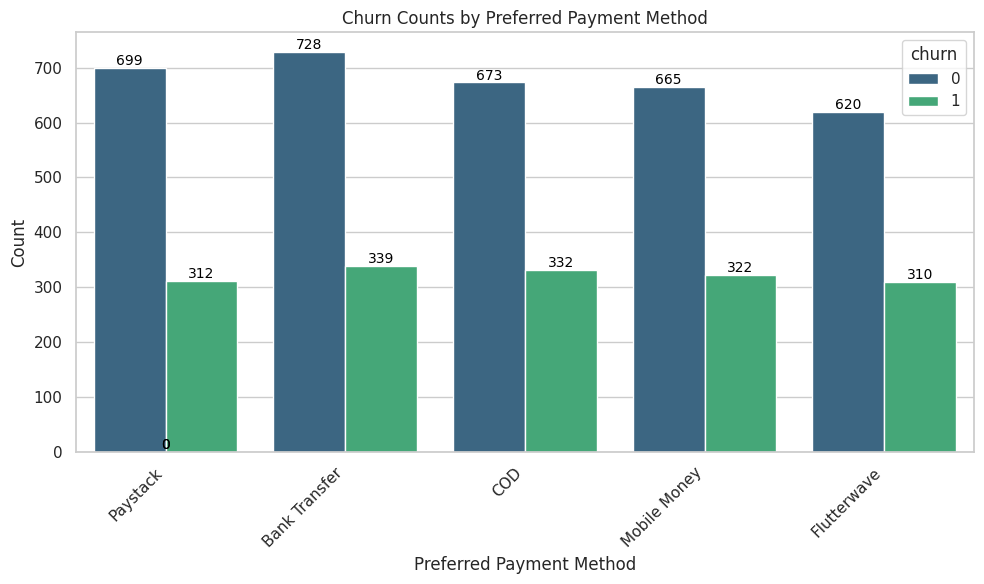

In [ ]:
# Calculate churn counts by preferred_payment method
churn_counts_by_payment_method = df_churn.groupby('preferred_payment')['churn'].value_counts().unstack().fillna(0)

print("Churn Counts by Preferred Payment Method:")
display(churn_counts_by_payment_method)

# Visualize churn counts by Preferred Payment Method using a countplot
plt.figure(figsize=(10, 6))
# Use sns.countplot to show counts of churn within each payment method
ax = sns.countplot(x="preferred_payment", hue="churn", data=df_churn, palette='viridis')
plt.title('Churn Counts by Preferred Payment Method')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # Display counts as integers
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Age Range distribution:


,count
Age_Range,
0-18,0
19-25,726
26-35,1065
36-45,1060
46-55,1028
56-65,1007
65+,114



Churn Rate by Age Range:


/tmp/ipython-input-2052443464.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_range = df_churn.groupby('Age_Range')['churn'].value_counts(normalize=True).unstack().fillna(0)


churn,0,1,ChurnRate
Age_Range,,,
0-18,0.000000,0.000000,0.000000
19-25,0.694215,0.305785,0.305785
26-35,0.681690,0.318310,0.318310
36-45,0.692453,0.307547,0.307547
46-55,0.658560,0.341440,0.341440
56-65,0.651440,0.348560,0.348560
65+,0.771930,0.228070,0.228070


/tmp/ipython-input-2052443464.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_age_range.index, y=churn_by_age_range['ChurnRate'], palette='viridis')


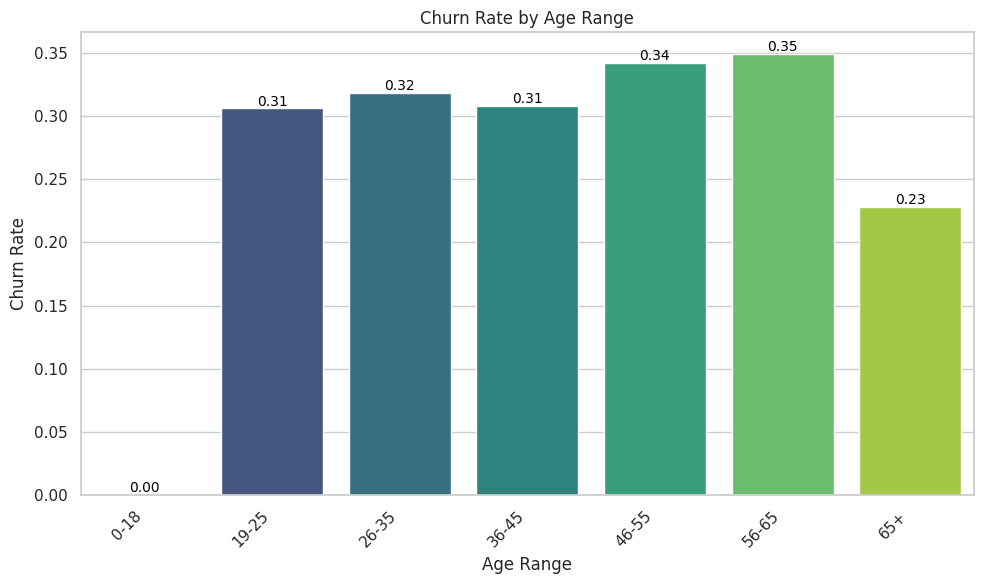

In [ ]:
# Create age ranges
# Define age bins - you can adjust these based on your data and analysis needs
# Corrected age_bins to ensure unique edges
age_bins = [0, 18, 25, 35, 45, 55, 65, df_churn['age'].max() + 1] # Example bins, added +1 to max age to make the last bin inclusive
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'] # Labels for the bins

# Ensure the number of labels is one less than the number of bins
if len(age_labels) != len(age_bins) - 1:
    print("Warning: Number of age labels does not match the number of age bins minus one.")
    # Adjust labels or bins as needed, for now proceed with the defined labels

df_churn['Age_Range'] = pd.cut(df_churn['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

print("Age Range distribution:")
display(df_churn['Age_Range'].value_counts().sort_index())

# Calculate churn rate by Age Range
churn_by_age_range = df_churn.groupby('Age_Range')['churn'].value_counts(normalize=True).unstack().fillna(0)

# The churn rate is the proportion of churned customers (churn=1)
churn_by_age_range['ChurnRate'] = churn_by_age_range[1]

# Sort by churn rate for better visualization (optional, sorting by label is also common)
# churn_by_age_range = churn_by_age_range.sort_values('ChurnRate', ascending=False)

print("\nChurn Rate by Age Range:")
display(churn_by_age_range)

# Visualize churn rate by Age Range
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=churn_by_age_range.index, y=churn_by_age_range['ChurnRate'], palette='viridis')
plt.title('Churn Rate by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

# Add churn rate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

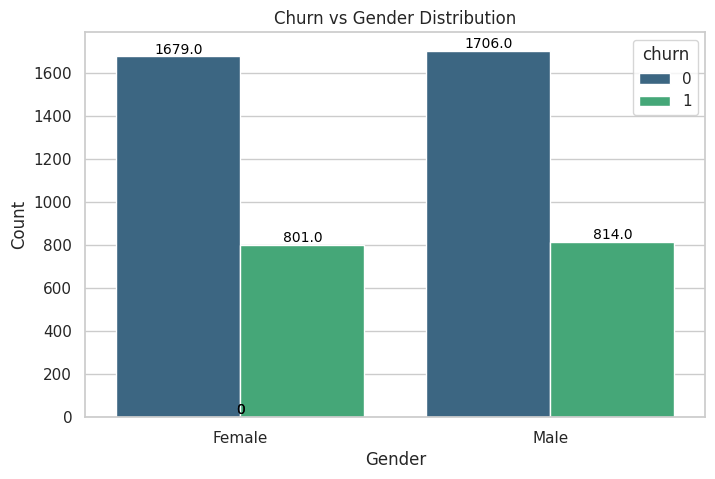

In [ ]:
# Churn vs Gender countplot
ax = sns.countplot(x='gender', hue='churn', data=df_churn, palette='viridis')
plt.title('Churn vs Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np # Import numpy for np.nan

# Identify ordinal features and their order
# Need to handle potential NaN in Age_Range if any age falls outside bins
ordinal_features = ['income_level', 'Age_Range', 'Spend_to_Income_Ratio_Quartile']

income_categories = [['Low', 'Middle', 'High']]
# Ensure labels match the ones used in Age_Range creation and handle potential NaN
# Get categories from the existing column, drop NaNs for encoder fitting
age_range_categories = [df_churn['Age_Range'].dropna().unique().categories.tolist()]
age_range_categories[0].sort() # Ensure a consistent order, assuming alphabetical is okay or define a specific order if needed

spend_ratio_categories = [['Low_Ratio', 'Medium_Low_Ratio', 'Medium_High_Ratio', 'High_Ratio']]


# Apply Ordinal Encoding
# handle_unknown='use_encoded_value' and unknown_value=-1 allows encoding of unseen values as -1
# We will handle potential NaNs by allowing them; OrdinalEncoder treats NaN as -1 by default
ordinal_encoder = OrdinalEncoder(categories=income_categories + age_range_categories + spend_ratio_categories,
                                 handle_unknown='use_encoded_value', unknown_value=-1)


# Fit and transform ordinal features
# Apply to a copy of the ordinal columns to see the transformation
df_churn_ordinal_encoded = df_churn[ordinal_features].copy()

# Fill potential NaNs in ordinal columns before fitting if they are not meant to be treated as -1
# For now, let's fit with NaNs to see how the encoder handles them
df_churn_ordinal_encoded[ordinal_features] = ordinal_encoder.fit_transform(df_churn_ordinal_encoded[ordinal_features])


print("Ordinal features encoded:")
display(df_churn_ordinal_encoded.head())

print("\nUnique values in encoded ordinal features:")
for col in ordinal_features:
    print(f"{col}: {df_churn_ordinal_encoded[col].unique()}")

# Note: This is just the ordinal encoding step. Nominal encoding and combining features will be done separately.

Ordinal features encoded:


,income_level,Age_Range,Spend_to_Income_Ratio_Quartile
0,2.0,4.0,1.0
1,2.0,3.0,2.0
2,1.0,5.0,1.0
3,0.0,2.0,3.0
4,2.0,3.0,1.0



Unique values in encoded ordinal features:
income_level: [2. 1. 0.]
Age_Range: [4. 3. 5. 2. 1. 6.]
Spend_to_Income_Ratio_Quartile: [1. 2. 3. 0.]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# === 1️⃣ Identify categorical features, exclude ordinal, identifier, target, and numeric ===
ordinal_features = ['income_level', 'Age_Range', 'Spend_to_Income_Ratio_Quartile']

# Select object-type columns only (exclude numeric)
categorical_cols = df_churn.select_dtypes(include='object').columns.tolist()

# Add explicitly categorical columns if they are not numeric
extra_categorical = ['City_Tier', 'Spend_to_Income_Ratio_Quartile', 'Age_Range']
all_categorical_features = list(set(categorical_cols + extra_categorical))

# Exclude ordinal features, identifier, and target
nominal_features = [col for col in all_categorical_features if col not in ordinal_features + ['customer_id', 'churn']]

print("Nominal features identified for One-Hot Encoding:", nominal_features)

# === 2️⃣ Apply One-Hot Encoding ===
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # or sparse=False if sklearn < 1.2
df_churn_nominal = df_churn[nominal_features].copy()
nominal_encoded_data = one_hot_encoder.fit_transform(df_churn_nominal)

# === 3️⃣ Create DataFrame from encoded data ===
nominal_encoded_df = pd.DataFrame(
    nominal_encoded_data,
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=df_churn_nominal.index
)

print("\nNominal features One-Hot Encoded (sample):")
display(nominal_encoded_df.head())

Nominal features identified for One-Hot Encoding: ['City_Tier', 'platform', 'state', 'city', 'preferred_payment', 'gender', 'loyalty_program']

Nominal features One-Hot Encoded (sample):


,City_Tier_Suburban,City_Tier_Urban,platform_Android,platform_Web,platform_iOS,state_Abuja,state_Lagos,state_Rivers,city_Asokoro,city_D-line,...,city_Yaba,preferred_payment_Bank Transfer,preferred_payment_COD,preferred_payment_Flutterwave,preferred_payment_Mobile Money,preferred_payment_Paystack,gender_Female,gender_Male,loyalty_program_No,loyalty_program_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# === 1️⃣ Prepare numeric subset ===
numeric_cols = df_churn.select_dtypes(include=np.number).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'churn']  # exclude target
numeric_subset = df_churn[['customer_id', 'churn'] + numeric_cols].copy()
numeric_subset['churn'] = numeric_subset['churn'].astype(int)
numeric_subset = numeric_subset.rename(columns={'customer_id': 'CustomerID'})

# === 2️⃣ Concatenate numeric, ordinal, and nominal features ===
df_churn_structured_encoded = pd.concat([
    numeric_subset,            # numeric + CustomerID + churn
    df_churn_ordinal_encoded,  # ordinal encoded features
    nominal_encoded_df         # one-hot encoded features
], axis=1)

# === 3️⃣ Quick checks ===
print("✅ Combined structured DataFrame ready for merging with embeddings")
print("Shape:", df_churn_structured_encoded.shape)
print("Missing values:", df_churn_structured_encoded.isnull().sum().sum())
print("Churn unique values:", df_churn_structured_encoded['churn'].unique())

display(df_churn_structured_encoded.head())

✅ Combined structured DataFrame ready for merging with embeddings
Shape: (5000, 51)
Missing values: 0
Churn unique values: [0 1]


,CustomerID,churn,age,order_frequency,avg_order_value,days_since_last_purchase,Recency,Frequency,Monetary,Loyalty_Risk_Factor,...,city_Yaba,preferred_payment_Bank Transfer,preferred_payment_COD,preferred_payment_Flutterwave,preferred_payment_Mobile Money,preferred_payment_Paystack,gender_Female,gender_Male,loyalty_program_No,loyalty_program_Yes
0,CUST00001,0,51,4,10000,20,20,4,10000,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,CUST00002,0,36,6,50000,65,65,6,50000,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,CUST00003,0,58,10,10000,113,113,10,10000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,CUST00004,0,28,4,20000,192,192,4,20000,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,CUST00005,0,41,10,10000,101,101,10,10000,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_reviews = pd.read_csv('gomart_reviews.csv')

In [ ]:
df_reviews.head(10)

,review_id,customer_id,platform,review_text
0,REV0000001,CUST00001,iOS,Affordable prices compared to competitors.
1,REV0000002,CUST00001,iOS,"Good quality 👌❤️, no wahala at all"
2,REV0000003,CUST00001,iOS,Loyalty program rewards are nice.
3,REV0000004,CUST00001,iOS,"Platform dey alright, nothing special 🤷"
4,REV0000005,CUST00001,iOS,"Great product quality, as described."
5,REV0000006,CUST00001,iOS,"Fast delivery, item arrived same day."
6,REV0000007,CUST00001,iOS,"Good quality 👌❤️, no wahala at all"
7,REV0000008,CUST00001,iOS,"Good quality 👌❤️, no wahala at all"
8,REV0000009,CUST00001,iOS,Sharp sharp delivery 🙌🔥
9,REV0000010,CUST00001,iOS,App dey okay but sometimes slow 📱⌛


In [ ]:
# Drop irrelevant columns from df_reviews
columns_to_drop_reviews = ['review_id', 'platform']

# Drop columns, ignoring errors in case a column doesn't exist
df_reviews = df_reviews.drop(columns=columns_to_drop_reviews, errors='ignore')

print("Columns in df_reviews after dropping:")
print(df_reviews.columns.tolist())

print("\nFirst few rows of df_reviews after dropping columns:")
display(df_reviews.head())

Columns in df_reviews after dropping:
['customer_id', 'review_text']

First few rows of df_reviews after dropping columns:


,customer_id,review_text
0,CUST00001,Affordable prices compared to competitors.
1,CUST00001,"Good quality 👌❤️, no wahala at all"
2,CUST00001,Loyalty program rewards are nice.
3,CUST00001,"Platform dey alright, nothing special 🤷"
4,CUST00001,"Great product quality, as described."


In [ ]:
!pip install emoji

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string
import emoji  #Include emoji handling as discussed previously if needed

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt') # Needed for tokenization later if not using a simple split

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Convert emojis to text
    text = emoji.demojize(text, delimiters=(" ", " "))
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the cleaning function
df_reviews['cleaned_review_text'] = df_reviews['review_text'].apply(clean_text)

print("Original review_text sample:")
display(df_reviews['review_text'].head())
print("\nCleaned review_text sample:")
display(df_reviews['cleaned_review_text'].head())

Original review_text sample:


,review_text
0,Affordable prices compared to competitors.
1,"Good quality 👌❤️, no wahala at all"
2,Loyalty program rewards are nice.
3,"Platform dey alright, nothing special 🤷"
4,"Great product quality, as described."



Cleaned review_text sample:


,cleaned_review_text
0,affordable prices compared competitors
1,good quality OKhand redheart wahala
2,loyalty program rewards nice
3,platform dey alright nothing special personshr...
4,great product quality described


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment_scores(text):
    if not isinstance(text, str):
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    return analyzer.polarity_scores(text)

df_reviews['vader_sentiment'] = df_reviews['cleaned_review_text'].apply(get_vader_sentiment_scores)

# Extract compound score into a separate column for easier analysis
df_reviews['vader_compound_score'] = df_reviews['vader_sentiment'].apply(lambda x: x['compound'])

print("VADER sentiment scores added:")
display(df_reviews[['cleaned_review_text', 'vader_sentiment', 'vader_compound_score']].head())

VADER sentiment scores added:


,cleaned_review_text,vader_sentiment,vader_compound_score
0,affordable prices compared competitors,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,good quality OKhand redheart wahala,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.4404
2,loyalty program rewards nice,"{'neg': 0.0, 'neu': 0.096, 'pos': 0.904, 'comp...",0.8555
3,platform dey alright nothing special personshr...,"{'neg': 0.273, 'neu': 0.484, 'pos': 0.242, 'co...",-0.0665
4,great product quality described,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249


In [ ]:
# Aggregate VADER compound scores by customer
# Calculate the mean compound score for each customer
aggregated_sentiment = df_reviews.groupby('customer_id')['vader_compound_score'].mean().reset_index()

# Rename the column for clarity
aggregated_sentiment = aggregated_sentiment.rename(columns={'vader_compound_score': 'average_sentiment_score'})

print("Aggregated sentiment scores by customer:")
display(aggregated_sentiment.head())

# Merge the aggregated sentiment scores with the main churn DataFrame
df_churn_merged = pd.merge(df_churn_structured_encoded, aggregated_sentiment, left_on='CustomerID', right_on='customer_id', how='left')

# Drop the redundant 'customer_id' column from the merged DataFrame
df_churn_merged = df_churn_merged.drop('customer_id', axis=1)

print("\nChurn DataFrame after merging with aggregated sentiment:")
display(df_churn_merged.head())

Aggregated sentiment scores by customer:


,customer_id,average_sentiment_score
0,CUST00001,0.154547
1,CUST00002,0.257597
2,CUST00003,0.283647
3,CUST00004,0.194357
4,CUST00005,0.197013



Churn DataFrame after merging with aggregated sentiment:


,CustomerID,churn,age,order_frequency,avg_order_value,days_since_last_purchase,Recency,Frequency,Monetary,Loyalty_Risk_Factor,...,preferred_payment_Bank Transfer,preferred_payment_COD,preferred_payment_Flutterwave,preferred_payment_Mobile Money,preferred_payment_Paystack,gender_Female,gender_Male,loyalty_program_No,loyalty_program_Yes,average_sentiment_score
0,CUST00001,0,51,4,10000,20,20,4,10000,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.154547
1,CUST00002,0,36,6,50000,65,65,6,50000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.257597
2,CUST00003,0,58,10,10000,113,113,10,10000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.283647
3,CUST00004,0,28,4,20000,192,192,4,20000,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.194357
4,CUST00005,0,41,10,10000,101,101,10,10000,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.197013


In [ ]:
df_churn_merged.columns

Index(['CustomerID', 'churn', 'age', 'order_frequency', 'avg_order_value',
       'days_since_last_purchase', 'Recency', 'Frequency', 'Monetary',
       'Loyalty_Risk_Factor', 'Churn_Risk_Index', 'Frequency_Risk',
       'Recency_Rank', 'Frequency_Rank', 'Income_Proxy',
       'Spend_to_Income_Ratio', 'income_level', 'Age_Range',
       'Spend_to_Income_Ratio_Quartile', 'City_Tier_Suburban',
       'City_Tier_Urban', 'platform_Android', 'platform_Web', 'platform_iOS',
       'state_Abuja', 'state_Lagos', 'state_Rivers', 'city_Asokoro',
       'city_D-line', 'city_Garki', 'city_Ikeja', 'city_Lekki', 'city_Maitama',
       'city_Mile 1', 'city_Port Harcourt GRA', 'city_Rumuokoro',
       'city_Surulere', 'city_Trans-Amadi', 'city_Utako',
       'city_Victoria Island', 'city_Wuse', 'city_Yaba',
       'preferred_payment_Bank Transfer', 'preferred_payment_COD',
       'preferred_payment_Flutterwave', 'preferred_payment_Mobile Money',
       'preferred_payment_Paystack', 'gender_Female', 'g

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Drop 'CustomerID' as it's an identifier and 'churn' as it's the target
X = df_churn_merged.drop(['CustomerID', 'churn'], axis=1)
y = df_churn_merged['churn']

# Split data into training and testing sets
# Using a test size of 0.2 (20%) and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display the first few rows of the training features
print("\nFirst few rows of X_train:")
display(X_train.head())

Data split into training and testing sets:
X_train shape: (4000, 50)
X_test shape: (1000, 50)
y_train shape: (4000,)
y_test shape: (1000,)

First few rows of X_train:


,age,order_frequency,avg_order_value,days_since_last_purchase,Recency,Frequency,Monetary,Loyalty_Risk_Factor,Churn_Risk_Index,Frequency_Risk,...,preferred_payment_Bank Transfer,preferred_payment_COD,preferred_payment_Flutterwave,preferred_payment_Mobile Money,preferred_payment_Paystack,gender_Female,gender_Male,loyalty_program_No,loyalty_program_Yes,average_sentiment_score
1422,50,1,50000,194,194,1,50000,1,10338.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.019783
189,40,5,5000,13,13,5,5000,0,6715.0,0.200000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.005077
2186,29,4,2000,114,114,4,2000,0,3898.0,0.250000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.277990
2784,23,7,5000,126,126,7,5000,0,5101.0,0.142857,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.226683
2188,53,3,2000,130,130,3,2000,1,12972.0,0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.284913


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
# Using default parameters for a baseline model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and binary classification

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained.")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression model trained.

Model Evaluation:
Accuracy: 0.677

Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       677
           1       0.00      0.00      0.00       323

    accuracy                           0.68      1000
   macro avg       0.34      0.50      0.40      1000
weighted avg       0.46      0.68      0.55      1000


Confusion Matrix:
 [[677   0]
 [323   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
# Using default parameters for a start
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest model trained.

Random Forest Model Evaluation:
Accuracy: 0.996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       677
           1       0.99      0.99      0.99       323

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[675   2]
 [  2 321]]


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
# Using default parameters for a start
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress deprecation warning

# Train the model on the training data
xgb_model.fit(X_train, y_train)

print("XGBoost model trained.")

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:28:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained.

XGBoost Model Evaluation:
Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       677
           1       0.99      1.00      0.99       323

    accuracy                           0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000


Confusion Matrix:
 [[673   4]
 [  1 322]]


In [ ]:
!pip install shap

SHAP values calculated for a sample of the test data.


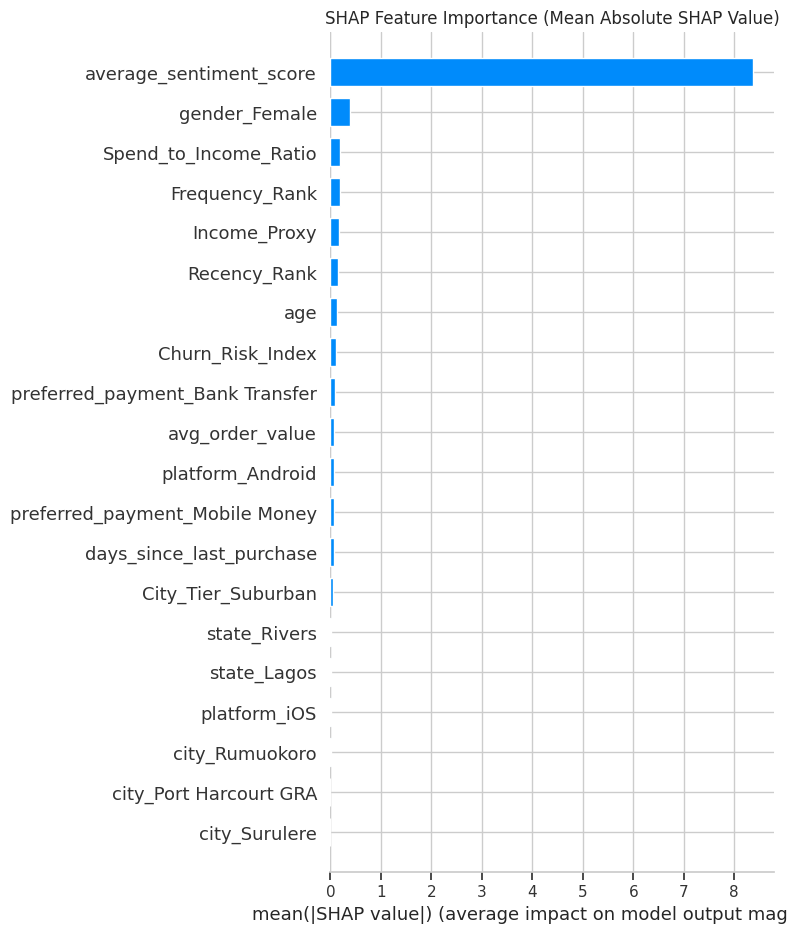

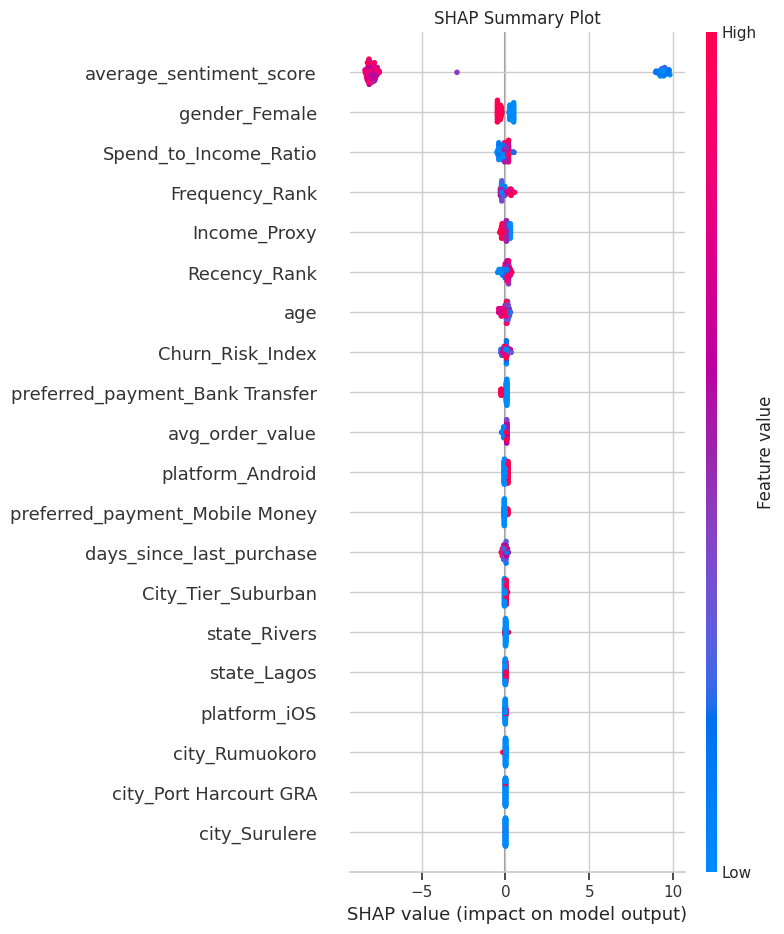

In [ ]:
import shap

# Initialize the SHAP explainer
# Use the TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test data
# We'll use a small sample of the test data for faster computation and visualization
sample_size = 100 # Adjust sample size as needed
X_test_sample = X_test.sample(n=sample_size, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

print("SHAP values calculated for a sample of the test data.")

# Visualize the SHAP values
# Summary plot: shows the importance of each feature across all instances
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean Absolute SHAP Value)")
plt.tight_layout()
plt.show()

# Summary plot: shows the distribution of SHAP values for each feature
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# We'll explain a prediction from the XGBoost model
# X_train is needed to provide context for the explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['Not Churn', 'Churn'],
    mode='classification'
)

# Choose an instance from the test set to explain
# Let's pick the first instance in the test set as an example
instance_idx = 0
instance_to_explain = X_test.iloc[instance_idx]

print(f"Explaining prediction for instance at index {instance_idx} in the test set.")
print("Actual churn status:", y_test.iloc[instance_idx])

# Explain the instance's prediction
# The explain_instance method returns an Explanation object
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain,
    predict_fn=xgb_model.predict_proba, # LIME needs predict_proba
    num_features=10 # Number of features to include in the explanation
)

# Visualize the explanation
print("\nLIME Explanation for the chosen instance:")
explanation.show_in_notebook(show_table=True, show_all=False)

Explaining prediction for instance at index 0 in the test set.
Actual churn status: 0


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


LIME Explanation for the chosen instance:


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
import joblib

# Define the filename for the saved model
model_filename = 'xgboost_churn_model.pkl'

# Save the trained XGBoost model
joblib.dump(xgb_model, model_filename)

print(f"XGBoost model saved to '{model_filename}'")

XGBoost model saved to 'xgboost_churn_model.pkl'
